# Optimize the Beale Function using `tf.train.Optimizer`

* This code is implemented by [`TensorFlow`](https://www.tensorflow.org) **NOT** `numpy` in order to compare the result of my optimizer which is made by only `numpy`.
* I've check that my codes are OK. ^o^

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm

import tensorflow as tf
tf.enable_eager_execution()

In [2]:
def f(x, y):
  return (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

In [3]:
minima = np.array([3., .5])
minima_ = minima.reshape(-1, 1)
print("minima (1x2 row vector shape): {}".format(minima))
print("minima (2x1 column vector shape):")
print(minima_)

minima (1x2 row vector shape): [3.  0.5]
minima (2x1 column vector shape):
[[3. ]
 [0.5]]


In [4]:
x_init = 0.7
x = tf.get_variable('x', dtype=tf.float32, initializer=tf.constant(x_init))
y_init = 1.4
y = tf.get_variable('y', dtype=tf.float32, initializer=tf.constant(y_init))

In [5]:
opt = tf.train.GradientDescentOptimizer(0.01)
#opt = tf.train.MomentumOptimizer(0.01, momentum=0.9, use_nesterov=True)
#opt = tf.train.AdagradOptimizer(0.2)
#opt = tf.train.RMSPropOptimizer(learning_rate=0.005, decay=0.9, epsilon=1e-10)
#opt = tf.train.AdamOptimizer(learning_rate=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8)

In [6]:
max_steps = 1000
print("steps: {}  z: {:.6f}  x: {:.5f}  y: {:.5f}".format(0, f(x, y).numpy(), x.numpy(), y.numpy()))
x_history = []
y_history = []
file = open('tf.txt', 'w')
file.write("{:.5f}  {:.5f}\n".format(x.numpy(), y.numpy()))
for step in range(max_steps):
  with tf.GradientTape() as g:
    #g.watch([x, y])
    z = f(x, y)
  x_history.append(x.numpy())
  y_history.append(y.numpy())
  dz_dx, dz_dy = g.gradient(z, [x, y])
  opt.apply_gradients(zip([dz_dx, dz_dy], [x, y]))
  file.write("{:.5f}  {:.5f}\n".format(x.numpy(), y.numpy()))
  
  if (step+1) % 100 == 0:
    print("steps: {}  z: {:.6f}  x: {:.5f}  y: {:.5f}  dx: {:.5f}  dy: {:.5f}".format(step+1, f(x, y).numpy(), x.numpy(), y.numpy(), dz_dx.numpy(), dz_dy.numpy()))
    
file.close()
    
x_history = np.array(x_history)
y_history = np.array(y_history)
path = np.concatenate((np.expand_dims(x_history, 1), np.expand_dims(y_history, 1)), axis=1).T

steps: 0  z: 26.496662  x: 0.70000  y: 1.40000
steps: 100  z: 0.096636  x: 2.44472  y: 0.32327  dx: -0.41345  dy: -0.16275
steps: 200  z: 0.021729  x: 2.69244  y: 0.41208  dx: -0.15311  dy: -0.04974
steps: 300  z: 0.007734  x: 2.80373  y: 0.44659  dx: -0.08138  dy: -0.02408
steps: 400  z: 0.003281  x: 2.86728  y: 0.46488  dx: -0.04962  dy: -0.01390
steps: 500  z: 0.001523  x: 2.90744  y: 0.47594  dx: -0.03243  dy: -0.00878
steps: 600  z: 0.000746  x: 2.93424  y: 0.48311  dx: -0.02207  dy: -0.00583
steps: 700  z: 0.000377  x: 2.95272  y: 0.48795  dx: -0.01541  dy: -0.00401
steps: 800  z: 0.000195  x: 2.96573  y: 0.49132  dx: -0.01094  dy: -0.00281
steps: 900  z: 0.000103  x: 2.97502  y: 0.49370  dx: -0.00786  dy: -0.00201
steps: 1000  z: 0.000055  x: 2.98172  y: 0.49540  dx: -0.00569  dy: -0.00144


In [7]:
# putting together our points to plot in a 3D plot
number_of_points = 50
margin = 4.5
x_min = 0. - margin
x_max = 0. + margin
y_min = 0. - margin
y_max = 0. + margin
x_points = np.linspace(x_min, x_max, number_of_points) 
y_points = np.linspace(y_min, y_max, number_of_points)
x_mesh, y_mesh = np.meshgrid(x_points, y_points)
z = np.array([f(xps, yps) for xps, yps in zip(x_mesh, y_mesh)])

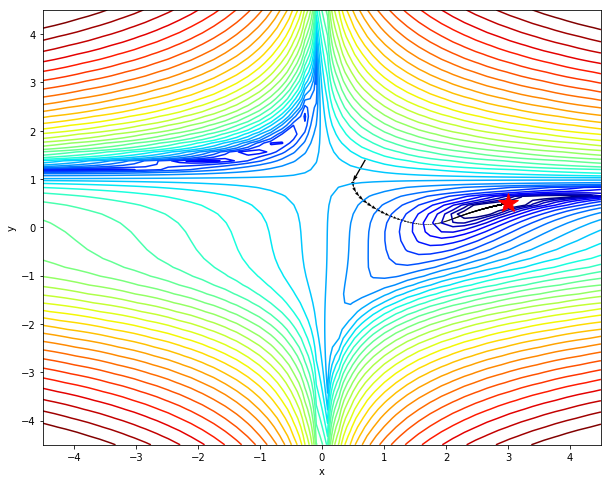

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.contour(x_mesh, y_mesh, z, levels=np.logspace(-.5, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima, 'r*', markersize=20)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1],
          scale_units='xy', angles='xy', scale=1, color='k')

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))

plt.show()